# Scene Categorization

### Importing the required libraries:

In [0]:
import numpy as np
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from seaborn import heatmap
import pandas as pd
from collections import Counter

### Mounting drive to Google Colab
Having the dataset in the google drive, we can mount it to be able to access from here.

In [0]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## Reading the SIFT-Features:
- Reading all the Sift features from Training data as well as Testing data.
- Storing them as dataFrames.

In [0]:
dataFrames = [pd.read_csv(
    "/content/drive/My Drive/HW3_data/train_sift_features/1_train_sift.csv",
    header = None).drop(columns = [0,1,2,3])]
for i in range(2, 1889):
  if(i % 100 == 0):
    print(i)
  dataFrames.append(pd.read_csv(
 "/content/drive/My Drive/HW3_data/train_sift_features/"+str(i)+"_train_sift.csv", 
      header = None).drop(columns = [0,1,2,3]))
data = pd.concat(dataFrames, axis = 0, ignore_index = True)

In [0]:
testDataFrames = [pd.read_csv(
    "/content/drive/My Drive/HW3_data/test_sift_features/1_test_sift.csv",
    header = None).drop(columns = [0,1,2,3])]
for i in range(2, 801):
  if(i % 100 == 0):
    print(i)
  testDataFrames.append(pd.read_csv(
   "/content/drive/My Drive/HW3_data/test_sift_features/"+str(i)+"_test_sift.csv",
      header = None).drop(columns = [0,1,2,3]))

In [0]:
data

,4,5,6,7,8,9,10,11,12,13,...,122,123,124,125,126,127,128,129,130,131
0,200,13,0,0,0,0,0,2,49,1,...,0,3,7,0,1,3,6,6,1,7
1,5,0,0,0,0,0,0,0,18,0,...,0,6,11,12,21,13,5,2,5,24
2,1,2,0,15,91,0,0,0,48,11,...,0,18,72,2,0,0,0,0,0,15
3,0,0,0,10,130,79,3,1,67,13,...,15,115,44,16,11,2,2,9,6,19
4,5,3,3,17,18,47,31,7,12,3,...,6,18,4,41,43,5,6,18,10,1
5,0,0,0,22,136,34,0,0,64,1,...,19,71,69,0,0,0,0,0,0,33
6,34,104,49,8,0,1,4,7,13,28,...,8,1,7,2,3,7,64,104,11,4
7,0,0,3,32,94,81,23,0,58,21,...,0,8,46,65,13,1,4,3,0,2
8,130,23,0,0,0,1,1,45,66,12,...,1,8,2,11,10,25,43,10,5,1
9,1,0,0,3,32,27,14,2,12,14,...,13,37,147,4,2,1,0,0,16,104


Since we need only the unique sift features for bag of words representation, we will drop duplicates.

In [0]:
data = data.drop_duplicates()
data

,4,5,6,7,8,9,10,11,12,13,...,122,123,124,125,126,127,128,129,130,131
0,200,13,0,0,0,0,0,2,49,1,...,0,3,7,0,1,3,6,6,1,7
1,5,0,0,0,0,0,0,0,18,0,...,0,6,11,12,21,13,5,2,5,24
2,1,2,0,15,91,0,0,0,48,11,...,0,18,72,2,0,0,0,0,0,15
3,0,0,0,10,130,79,3,1,67,13,...,15,115,44,16,11,2,2,9,6,19
4,5,3,3,17,18,47,31,7,12,3,...,6,18,4,41,43,5,6,18,10,1
5,0,0,0,22,136,34,0,0,64,1,...,19,71,69,0,0,0,0,0,0,33
6,34,104,49,8,0,1,4,7,13,28,...,8,1,7,2,3,7,64,104,11,4
7,0,0,3,32,94,81,23,0,58,21,...,0,8,46,65,13,1,4,3,0,2
8,130,23,0,0,0,1,1,45,66,12,...,1,8,2,11,10,25,43,10,5,1
9,1,0,0,3,32,27,14,2,12,14,...,13,37,147,4,2,1,0,0,16,104


It was observed that there were 299 duplicates.

In [0]:
data = np.array(data)
data.shape

(413672, 128)

- Now that we have 4 lakh unique features, it would be difficult to represent each image as a Bag of Words representation of these many features.
- Hence, we do K-Means clustering to have a limited number of features (Bag of Visual words).
- We now have 30 lengthed vector (bag of quantised local visual features).

In [0]:
ans = KMeans(30, max_iter = 4).fit(data)

In [0]:
ans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=4,
    n_clusters=30, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

### Now, based on our KMeans model, all our sift-features are fit into this.

In [0]:
ans.labels_.shape

(413672,)

### The first few sift-features are displayed below.
### Each one is mapped to one of the 30 classes.

In [0]:
ans.labels_[:200]

array([25, 11, 21, 21, 22, 21, 24, 18,  7, 11, 27, 23, 23, 12, 28, 16, 15,
       18, 15, 20, 14, 11,  4, 18, 21, 13, 29, 18,  9,  7,  1, 26, 12, 24,
       10, 11, 19, 16,  8, 18,  7, 14, 22,  2,  1, 20,  7, 25,  4,  1, 15,
       21, 26, 21, 14, 29, 15, 21,  4,  2, 15, 21,  4, 12,  9,  3, 23,  1,
       15, 24,  4,  3, 22, 25, 27, 20, 16,  8, 26, 15,  0, 18, 15, 21, 10,
        1, 20, 21,  9,  9, 10,  1, 29,  3, 29, 15,  5, 16,  3, 15, 15, 20,
       29,  4, 24, 22, 29, 21, 21, 13, 16,  0,  8, 24,  1,  4, 26,  4, 27,
        7, 15, 13,  5,  8, 21,  7, 10, 26,  3, 13, 29,  7,  6,  4, 21, 21,
        7, 16, 24, 27,  0, 18, 11, 22,  7,  8,  3, 20,  1, 29,  3, 23, 29,
        7, 29, 21,  2, 26, 27, 20, 24,  4, 23,  9,  7,  0,  8, 18, 29,  3,
        1, 11, 24, 21, 20, 19, 29,  7, 10, 29, 22, 17, 28,  6, 25, 12, 19,
       15,  0, 28, 16,  0, 20, 20, 18, 21, 21, 17, 14,  0], dtype=int32)

In [0]:
N = len(dataFrames)
train_counters = list(map(lambda x: Counter(ans.predict(np.array(x))), dataFrames))
train_histograms = np.zeros((N, 30))
for i in range(N):
  for key in train_counters[i]:
    train_histograms[i][key]=train_counters[i][key]

### Now for each of the training examples, we get a 30-lengthed vector (a histogram), which stores the count of sift-features getting mapped to one of the 30 clusters.


In [0]:
train_histograms.shape

(1888, 30)

In [0]:
N_ = len(testDataFrames)
test_counters = list(map(lambda x: Counter(ans.predict(np.array(x))), testDataFrames))
test_histograms = np.zeros((N_, 30))
for i in range(N_):
  for key in test_counters[i]:
    test_histograms[i][key] = test_counters[i][key]

In [0]:
test_histograms.shape, test_histograms

array([[14.,  7.,  6., ..., 12.,  6.,  5.],
       [ 1.,  3.,  3., ...,  3.,  1.,  6.],
       [ 4., 16.,  3., ...,  3.,  4.,  7.],
       ...,
       [23.,  5.,  2., ..., 15., 37.,  2.],
       [18.,  6.,  2., ...,  7., 19., 14.],
       [ 0.,  2.,  8., ...,  0.,  2.,  3.]])

### We now obtain the labels for all the training images which we will use to classify the test images based on K-nearest Neighbour classifier.
- Here we took k as 10 (10-Nearest Neighbour classifier).

In [0]:
train_labels = np.array(
    pd.read_csv("/content/drive/My Drive/HW3_data/train_labels.csv",
                header = None))[0]
test_labels = np.array(
    pd.read_csv("/content/drive/My Drive/HW3_data/test_labels.csv", 
                header = None))[0]


In [0]:
knn = KNeighborsClassifier(n_neighbors = 10).fit(train_histograms, train_labels)

## Now, for each test-image, we predict the class label based on K-Nearest Neighbour classifier and then generate the Confusion Matrix and find the Accuracy.

Accuracy:  48.625 %
Confusion matrix:


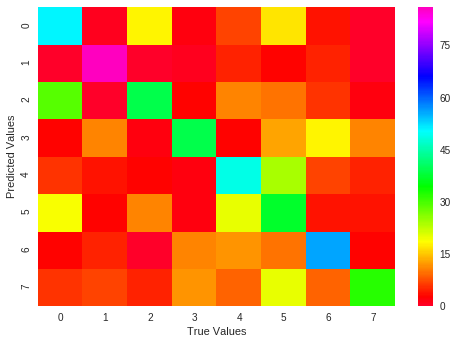

In [0]:
#test_classes = list(map())
test_classes=[]
for i in test_histograms:
  test_classes.append(knn.predict([i])[0])
test_classes = np.array(test_classes)
print("Accuracy: ", accuracy_score(test_labels, test_classes)*100, "%")
print("Confusion matrix:")
heatmap(confusion_matrix(test_labels, test_classes), cmap="gist_rainbow")
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()
#count = 0
#for i in range(N_):
#  if(test_classes[i] == test_labels[i]):
#    count+=1
#print(count)
#print("Accuracy = ",100*count/N_,"%",sep="")

## The Function
### performCategorizatino(k,  n) takes two arguments k and n, where k is the number of clusters and n is the number of nearest neighbours to be considered.

In [0]:
def performCategorization(k, n):
  ans = KMeans(k, max_iter = 4).fit(data)
  N = len(dataFrames)
  train_counters = list(map(lambda x: Counter(ans.predict(np.array(x))), dataFrames))
  train_histograms = np.zeros((N, k))
  for i in range(N):
    for key in train_counters[i]:
      train_histograms[i][key]=train_counters[i][key]
  N_ = len(testDataFrames)
  test_counters = list(map(lambda x: Counter(ans.predict(np.array(x))), testDataFrames))
  test_histograms = np.zeros((N_, k))
  for i in range(N_):
    for key in test_counters[i]:
      test_histograms[i][key]=test_counters[i][key]
  knn = KNeighborsClassifier(n_neighbors = n).fit(train_histograms, train_labels)
  test_classes=[]
  for i in test_histograms:
    test_classes.append(knn.predict([i])[0])
  test_classes = np.array(test_classes)
  print("Accuracy: ", accuracy_score(test_labels, test_classes)*100, "%")
  print("Confusion matrix:")
  heatmap(confusion_matrix(test_labels, test_classes), cmap="gist_rainbow")
  plt.xlabel('True Values')
  plt.ylabel('Predicted Values')
  plt.show()

Accuracy:  55.50000000000001 %
Confusion matrix:


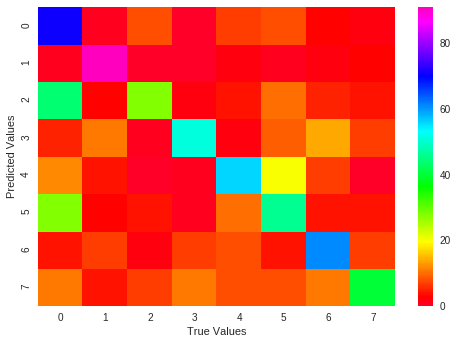

In [0]:
performCategorization(100, 30)

Accuracy:  54.87499999999999 %
Confusion matrix:


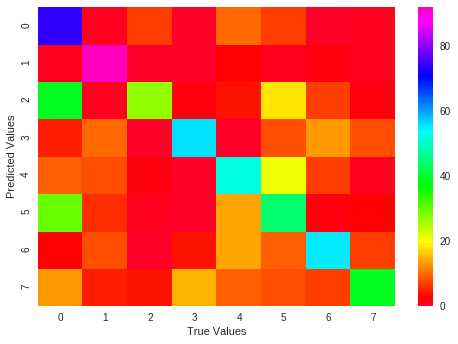

In [0]:
performCategorization(100, 50)

Accuracy:  54.0 %
Confusion matrix:


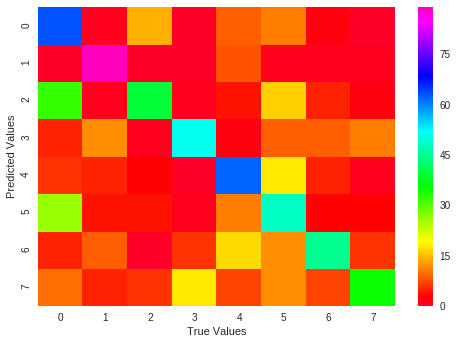

In [0]:
performCategorization(100, 15)

Accuracy:  54.0 %
Confusion matrix:


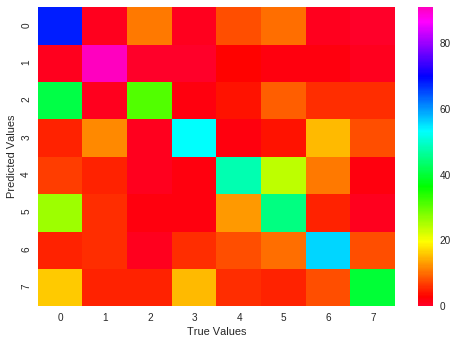

In [0]:
performCategorization(100, 40)

Accuracy:  53.87499999999999 %
Confusion matrix:


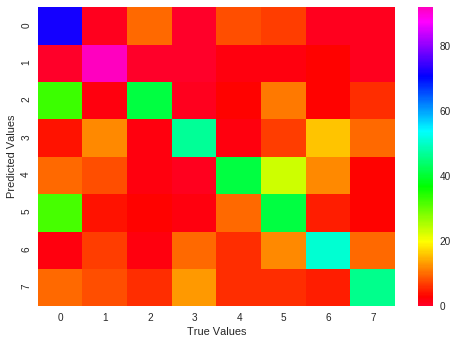

In [0]:
performCategorization(100, 20)

Accuracy:  53.87499999999999 %
Confusion matrix:


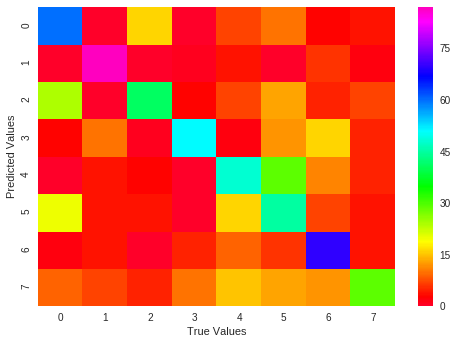

In [0]:
performCategorization(40, 30)

Accuracy:  53.625 %
Confusion matrix:


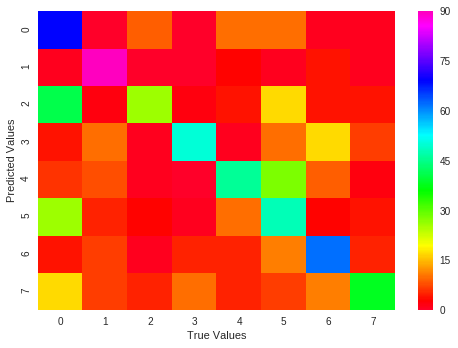

In [0]:
performCategorization(100, 60)

Accuracy:  51.87500000000001 %
Confusion matrix:


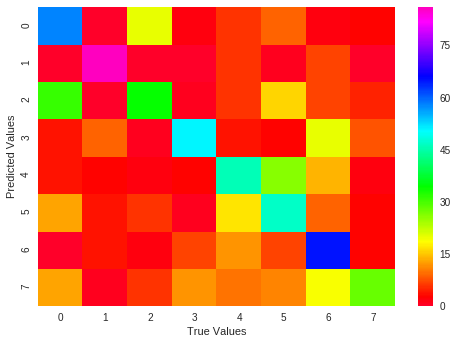

In [0]:
performCategorization(35, 30)

Accuracy:  51.625 %
Confusion matrix:


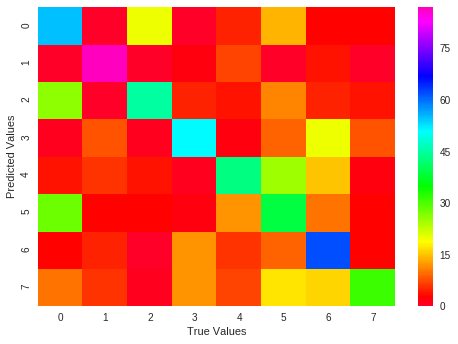

In [0]:
performCategorization(25, 30)

Accuracy:  50.5 %
Confusion matrix:


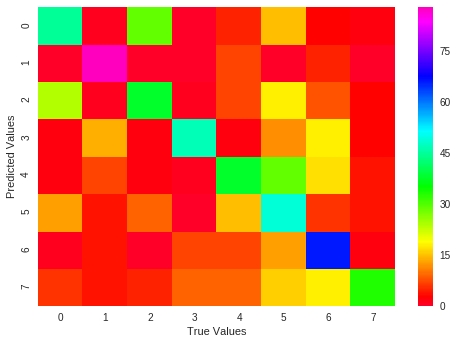

In [0]:
performCategorization(20, 30)

Accuracy:  50.5 %
Confusion matrix:


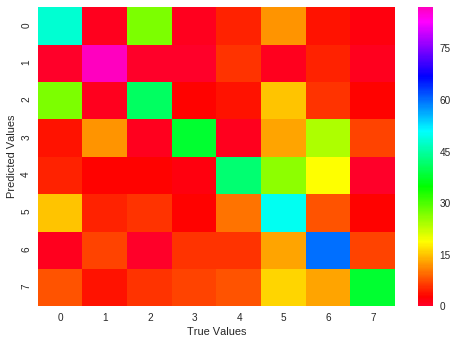

In [0]:
performCategorization(30, 30)